#### For the exercises we will use **Iris flower dataset**

#### The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

#### Loading libraries

In [27]:
# Numpy for numerical analysis
import numpy as np

# Pandas for reading and exploring dataset
import pandas as pd

# Matplotlib for data visualization
import matplotlib.pyplot as plt

# For showing learning metrics  
from sklearn import metrics

# For all the metrics

# MSE
from sklearn.metrics import mean_squared_error

# For accuracy score
from sklearn.metrics import accuracy_score

# For splitting input data in to train and test dataset
from sklearn.model_selection import train_test_split

# For importing methods related to preprocessinng
from sklearn import preprocessing

# Importing scikit-learn algorithms

# Linear regression
from sklearn.linear_model import LinearRegression

# SVM

# Decision tree

# Random forest

# Logistic regression
from sklearn.linear_model import LogisticRegression

#### Loading data

In [60]:
iris = pd.read_csv("https://raw.githubusercontent.com/vamsivarma/datasets/master/machine_learning/iris/iris_orig.csv")

# Exercises

**Exercise 1**: Write a Python program to split the iris dataset into its attributes (X) and labels (y). The X variable contains the first four columns (i.e. attributes) and y contains the labels of the dataset.

In [29]:
display(iris.head(10))

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [62]:
features = iris.drop('species',axis=1)
labels = iris['species']

**Exercise 2**: Write a Python program using Scikit-learn to split the iris dataset into 70% train data and 30% test data. Out of total 150 records, the training set will contain 120 records and the test set contains 30 of those records. Print both datasets.

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=1)

**Exercise 3**: Write a Python program using Scikit-learn to convert Species columns in a numerical column of the iris dataframe. To encode this data map convert each value to a number. e.g. Iris-setosa:0, Iris-versicolor:1, and Iris-virginica:2. Now print the iris dataset into 80% train data and 20% test data. Out of total 150 records, the training set will contain 120 records and the test set contains 30 of those records. Print both datasets.

In [64]:
le = preprocessing.LabelEncoder()
le.fit(np.unique(y_train))
y_train = le.transform(y_train)

print('species:',np.unique(y_train))
le.fit(np.unique(y_test))
y_test = le.transform(y_test)
print('species', y_test)

species: [0 1 2]
species [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 2 2 1]


Exercises related to Logistic regression

**Exercise 8**: Write a Python program to view some basic statistical details like percentile, mean, std etc. of the species of 'Iris-setosa', 'Iris-versicolor' and 'Iris-versicolor'

In [33]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Exercise 9**: Write a Python program to create a scatter plot using sepal length and petal_width to separate the Species classes.

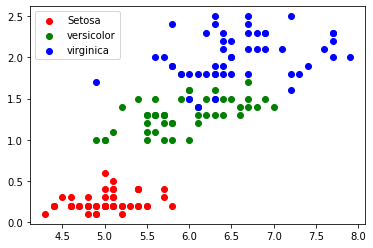

In [34]:
plt.scatter(iris[iris['species'] == 'setosa' ].sepal_length,iris[iris['species'] == 'setosa'].petal_width,c='red',label='Setosa')
plt.scatter(iris[iris['species'] == 'versicolor' ].sepal_length,iris[iris['species'] == 'versicolor'].petal_width,c='green',label='versicolor')
plt.scatter(iris[iris['species'] == 'virginica' ].sepal_length,iris[iris['species'] == 'virginica'].petal_width,c='blue',label='virginica')
plt.legend()
#np.unique(iris['species'])

**Exercise 10**: Write a Python program to get the accuracy of the Logistic Regression.

In [65]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [66]:
predict_train = model.predict(X_train)
accuracy_train = accuracy_score(y_train,predict_train)
display(accuracy_train)
display(model.score(X_test,y_test))

0.9809523809523809

0.9777777777777777

In [37]:
predict_test = model.predict(X_test)
accuracy_test = accuracy_score(y_test,predict_test)
display(accuracy_test)



0.9777777777777777

In [77]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from  sklearn.metrics import confusion_matrix

ars = {}
cm = []

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

prediction = rfc.predict(X_test)

cm1 = confusion_matrix(y_test,prediction)
cm.append(cm1)

ars['random forest'] = adjusted_rand_score(prediction,y_test)

tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

prediction = tree.predict(X_test)

cm2 = confusion_matrix(y_test,prediction)
cm.append(cm2)

ars['decision tree'] = adjusted_rand_score(prediction,y_test)

lr = LogisticRegression()
lr.fit(X_train,y_train)

prediction = lr.predict(X_test)

cm3 = confusion_matrix(y_test,prediction)
cm.append(cm3)

ars['regression'] = adjusted_rand_score(prediction,y_test)

svc = SVC()
svc.fit(X_train,y_train)

prediction = svc.predict(X_test)

cm4 = confusion_matrix(y_test,prediction)
cm.append(cm4)

ars['support vector'] = adjusted_rand_score(prediction,y_test)

ars
cm

[array([[14,  0,  0],
        [ 0, 17,  1],
        [ 0,  1, 12]]), array([[14,  0,  0],
        [ 0, 17,  1],
        [ 0,  1, 12]]), array([[14,  0,  0],
        [ 0, 17,  1],
        [ 0,  0, 13]]), array([[14,  0,  0],
        [ 0, 17,  1],
        [ 0,  0, 13]])]

**Exercise 11**: Apply Linear regression on Iris dataset

In [39]:
features = iris.drop('petal_width',axis=1)
temp = pd.get_dummies(features['species'])
features[['setosa','versicolor','virginica']] = temp
features = features.drop('species',axis=1)
labels = iris['petal_width']

In [40]:
display(features[features['versicolor'] == 1].head(10))

,sepal_length,sepal_width,petal_length,setosa,versicolor,virginica
50,7.0,3.2,4.7,0,1,0
51,6.4,3.2,4.5,0,1,0
52,6.9,3.1,4.9,0,1,0
53,5.5,2.3,4.0,0,1,0
54,6.5,2.8,4.6,0,1,0
55,5.7,2.8,4.5,0,1,0
56,6.3,3.3,4.7,0,1,0
57,4.9,2.4,3.3,0,1,0
58,6.6,2.9,4.6,0,1,0
59,5.2,2.7,3.9,0,1,0


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=1)

In [42]:
maes = {}

In [43]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()


In [44]:
lr.fit(X_train,y_train)
prediction = lr.predict(X_test)

In [45]:
mae = np.mean(np.abs(prediction - y_test))
print(mae)
maes['linear reg.'] = mae

0.126839517833185


**Exercise 12**: Apply SVM on Iris dataset

In [46]:
from sklearn import svm
regr = svm.SVR()
regr.fit(X_train,y_train)
prediction = regr.predict(X_test)
mae = np.mean(np.abs(prediction - y_test))
print(mae)
maes['support vector reg.'] = mae


0.11704570395108228


**Exercise 16**: Apply Decision tree on Iris dataset

In [47]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(criterion='absolute_error', splitter='best')
tree.fit(X_train,y_train)

prediction = tree.predict(X_test)
mae = np.mean(np.abs(prediction - y_test))
print(mae)
maes['decision tree'] = mae

0.15333333333333327


**Exercise 17**: Apply Random forest on Iris dataset

In [48]:
from sklearn.ensemble import RandomForestRegressor

rfg = RandomForestRegressor(n_estimators=250,criterion='absolute_error')
rfg.fit(X_train,y_train)

prediction = rfg.predict(X_test)

mae = np.mean(np.abs(prediction - y_test))
print(mae)
maes['random forest reg.'] = mae

0.1265288888888882


**Exercise 20**: Find accuracy score for all the algorithms (Linear regression, Logistic regression, SVM, Decision tree etc..,) mentioned above and compare them

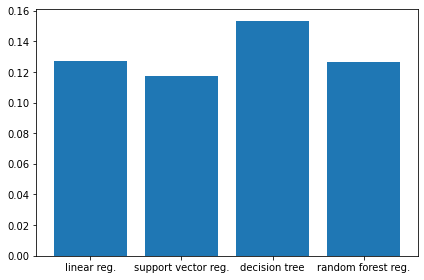

In [49]:
plt.bar(maes.keys(), maes.values())

plt.tight_layout()
plt.show()


**Exercise 21**: Find classification report score for all the algorithms (Linear regression, Logistic regression, SVM, Decision tree etc..,) mentioned above and compare them

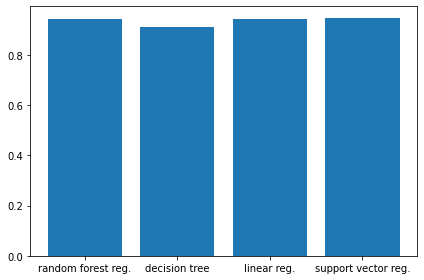

In [50]:
acc = {}

acc['random forest reg.'] =rfg.score(X_test,y_test)
acc['decision tree'] = tree.score(X_test,y_test)
acc['linear reg.'] = lr.score(X_test,y_test)
acc['support vector reg.'] = regr.score(X_test,y_test)

plt.bar(acc.keys(), acc.values())

plt.tight_layout()
plt.show()

**Exercise 22**: Find confusion matrix for all the classification algorithms (Logistic regression, SVM, Decision tree etc..,) mentioned above and compare them

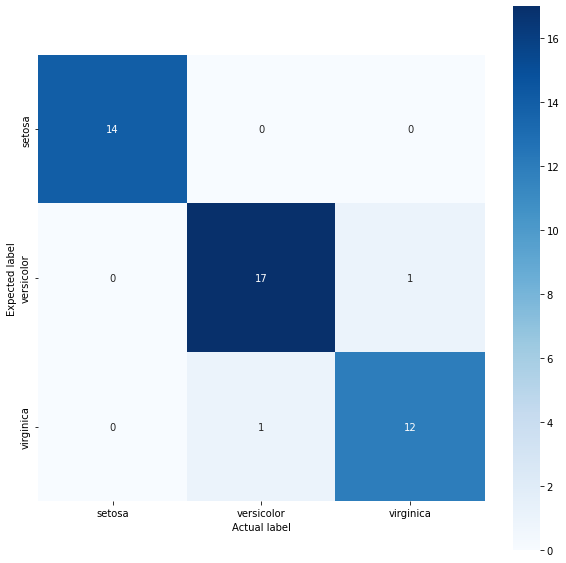

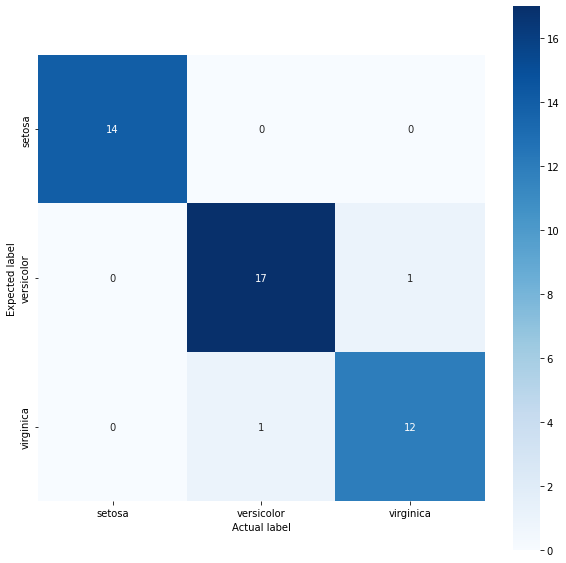

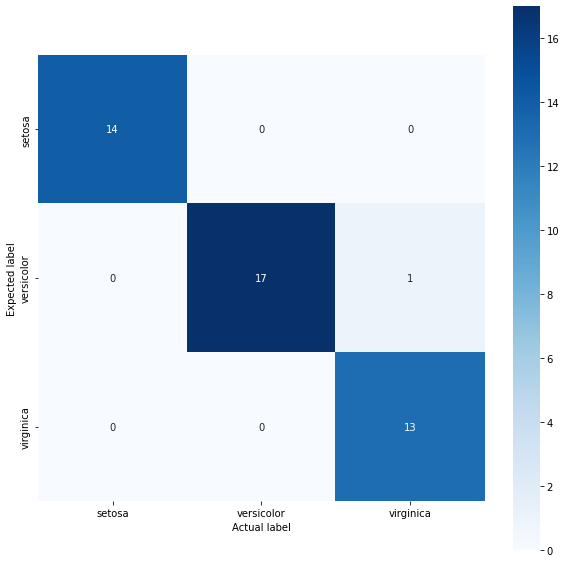

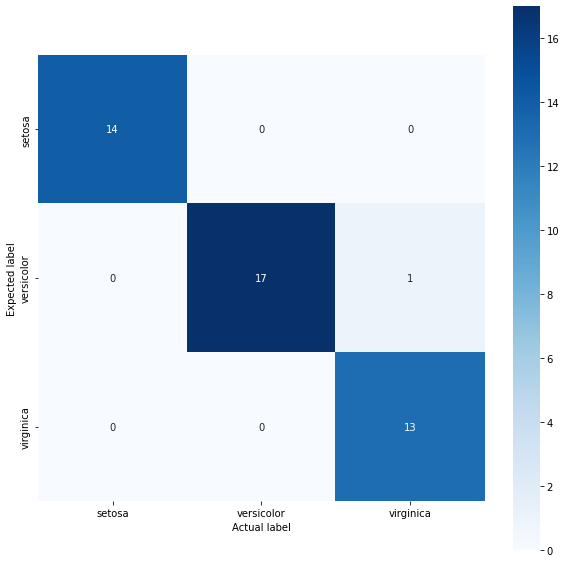

In [78]:
import seaborn as sns
for i in range(len(cm)):
  plt.figure(figsize=[10, 10])
  sns.heatmap(data=cm[i], annot=True, cmap='Blues', square=True, xticklabels=iris['species'].unique(), yticklabels= iris['species'].unique())
  plt.xlabel('Actual label')
  plt.ylabel('Expected label')
  plt.show()

**Exercise 23**: Find MSE - mean squared error and MAE - mean absolute error, R2 score for the regression algorithms (Linear regression, Random forest etc..,) mentioned above and compare them

In [52]:
mse = {}

prediction = rfg.predict(X_test)
mse['random forest reg.'] =np.mean(np.square(prediction - y_test))

prediction = tree.predict(X_test)
mse['decision tree'] = np.mean(np.square(prediction - y_test))

prediction = lr.predict(X_test)
mse['linear reg.'] = np.mean(np.square(prediction - y_test))

prediction = regr.predict(X_test)
mse['support vector reg.'] = np.mean(np.square(prediction - y_test))

s1 = pd.Series(mse,index=mse.keys())
s2 = pd.Series(maes,index=maes.keys())
s3 = pd.Series(acc,index=acc.keys())

df = pd.DataFrame([s1,s2,s3],index=['mse', 'mae', 'acc'])
df

,random forest reg.,decision tree,linear reg.,support vector reg.
mse,0.029508,0.045556,0.027759,0.027181
mae,0.126529,0.153333,0.126840,0.117046
acc,0.941689,0.909977,0.945145,0.946287


In [74]:

df_t =df.T
df_t = df_t.reset_index(level=0)

df_t = df_t.rename({'index':'type'},axis=1)
df_t['type'] = df_t['type'].apply(lambda x: x.split('reg.')[0].strip())
df_t['type'] = df_t['type'].apply(lambda x: x if x != 'linear' else 'regression')

df_t = df_t.sort_values(by=['acc','mae'], ascending=False)

df_t


,type,mse,mae,acc
3,support vector,0.027181,0.117046,0.946287
2,regression,0.027759,0.126840,0.945145
0,random forest,0.029508,0.126529,0.941689
1,decision tree,0.045556,0.153333,0.909977


**Exercise 24**: Find adjusted rand index for all the algorithms

In [75]:
df_t['ars'] = df_t['type'].map(ars)

df_t

,type,mse,mae,acc,ars
3,support vector,0.027181,0.117046,0.946287,0.930738
2,regression,0.027759,0.126840,0.945145,0.930738
0,random forest,0.029508,0.126529,0.941689,0.866525
1,decision tree,0.045556,0.153333,0.909977,0.866525


# References
https://www.w3resource.com/machine-learning/scikit-learn/iris/index.php